In [8]:
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
from IPython.display import Audio

## **Aufgabe 1:**
Erstellt eine Tonleiter die den Bereich von 2 Oktaven beinhaltet mit Sinustönen

In [22]:
def midi_to_freq(p):
    return 440 * 2 ** ((p - 69) / 12)

def sine(sr,notes):
  out = np.zeros(len(notes) * sr)
  idx = 0
  for note in notes:
    for i in range(sr):
      out[idx] = np.sin(2 * np.pi * (i / sr) * midi_to_freq((note)))
      idx += 1
  return out

In [23]:
sr = 44100
notes = np.array([60,61,62,63,64,65,66,67,68,69,70,70,71,72,73,74,75,76,77,78,79,80,81,82], dtype = int)
out = sine(sr,notes)


display(Audio(out, rate = sr))

## **Aufgabe 1.1:**
Verwendet Librosa um das Chromagramm zu plotten \
[librosa](https://librosa.org/doc/main/generated/librosa.feature.chroma_stft.html#librosa.feature.chroma_stft) \
[doc](https://en.wikipedia.org/wiki/Chroma_feature)

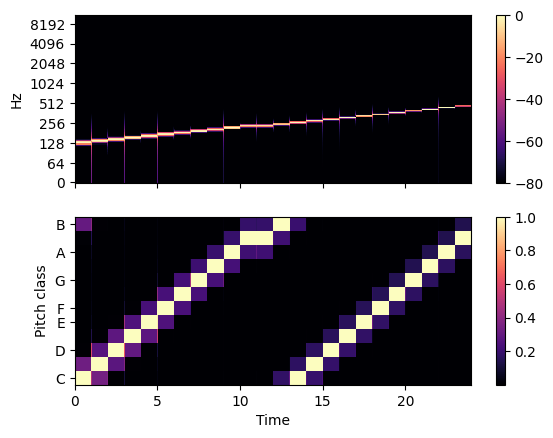

In [25]:
S = np.abs(lr.stft(out, n_fft=4096))**2
chroma = lr.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = lr.display.specshow(lr.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = lr.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])




## **Aufgabe 1.2:**
Importiert ein Sample und plottet das Chromagramm

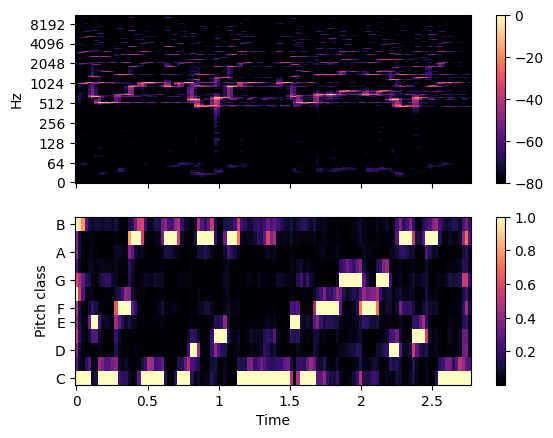

In [27]:
samp, sr = lr.load("/content/drumandbass.mp3")
S = np.abs(lr.stft(samp, n_fft=4096))**2
chroma = lr.feature.chroma_stft(S=S, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = lr.display.specshow(lr.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = lr.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

## **Aufgabe 2:**
Verwendet Librosa um den Spectral Centroid vom Sample zu plotten \
[librosa](https://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html) \
[doc](https://en.wikipedia.org/wiki/Spectral_centroid#:~:text=The%20spectral%20centroid%20is%20a,called%20center%20of%20spectral%20mass.)

[Text(0.5, 1.0, 'log Power spectrogram')]

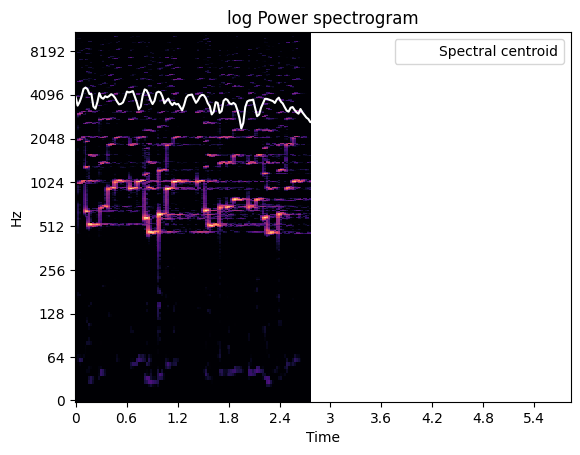

In [28]:
cent = lr.feature.spectral_centroid(y=samp, sr=sr)
times = lr.times_like(cent)
fig, ax = plt.subplots()
lr.display.specshow(lr.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')


## **Aufgabe 3:**
Sucht euch ein Feature von der Librosa library und plottet das Ergebnis \
[librosa](https://librosa.org/doc/main/feature.html#)